In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
motion_df = pd.read_csv('train_data.csv')
motion_df.head()
motion_df.tail()
motion_df.shape
motion_df['fall'].value_counts()

0    107
1     91
Name: fall, dtype: int64

<AxesSubplot: xlabel='shoulderRx', ylabel='kneeRx'>

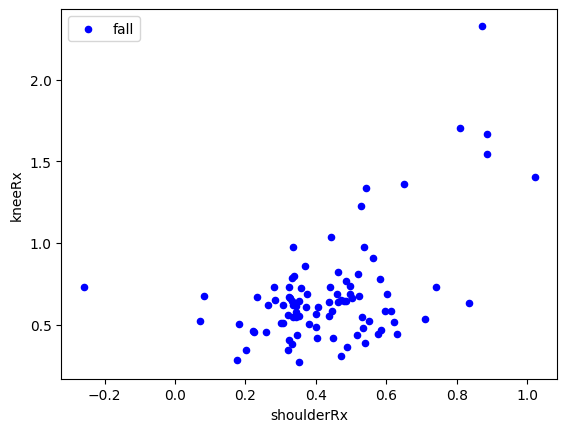

In [3]:
notFall_df=motion_df[motion_df['fall']==0]
fall_df = motion_df[motion_df['fall']==1]

fall_df.plot(kind='scatter', x='shoulderRx', y='kneeRx',color='blue',label='fall')

<AxesSubplot: xlabel='shoulderRx', ylabel='kneeRx'>

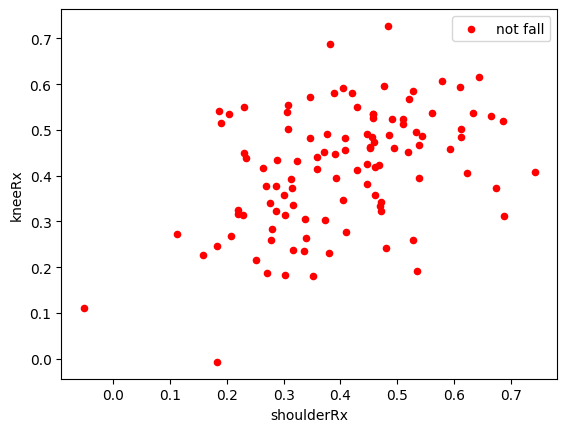

In [4]:
notFall_df.plot(kind='scatter', x='shoulderRx', y='kneeRx',color='red',label='not fall')

<AxesSubplot: ylabel='Density'>

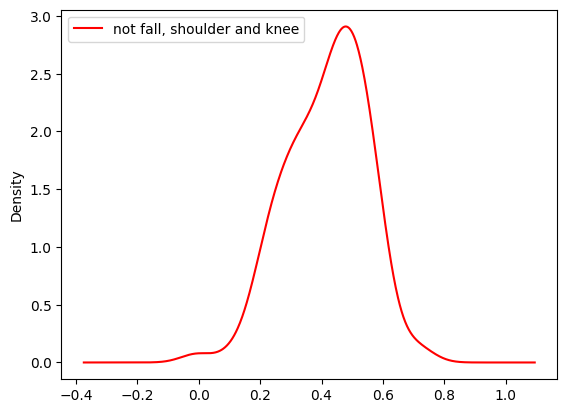

In [5]:
notFall_df.plot(kind='kde', x='shoulderRx', y='kneeRx',color='red',label='not fall, shoulder and knee')

<AxesSubplot: ylabel='Density'>

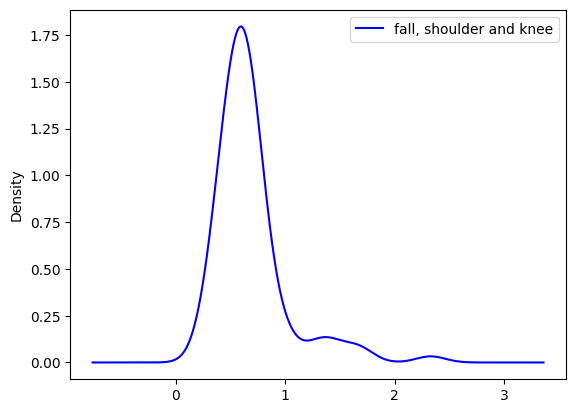

In [6]:
fall_df.plot(kind='kde', x='shoulderRx', y='kneeRx',color='blue',label='fall, shoulder and knee')

<AxesSubplot: ylabel='Density'>

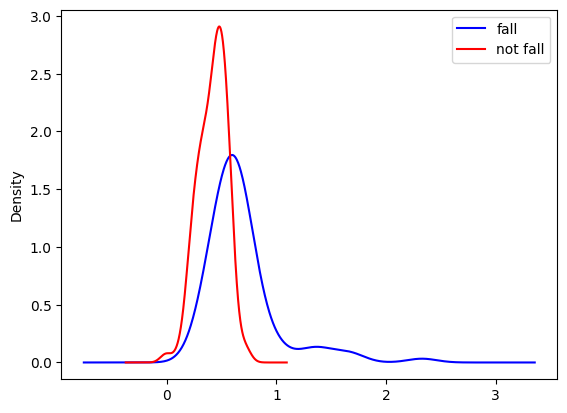

In [7]:
axes=fall_df.plot(kind='kde', x='shoulderRx', y='kneeRx',color='blue',label='fall')
notFall_df.plot(kind='kde', x='shoulderRx', y='kneeRx',color='red',label='not fall', ax=axes)

<AxesSubplot: xlabel='shoulderRx', ylabel='kneeRx'>

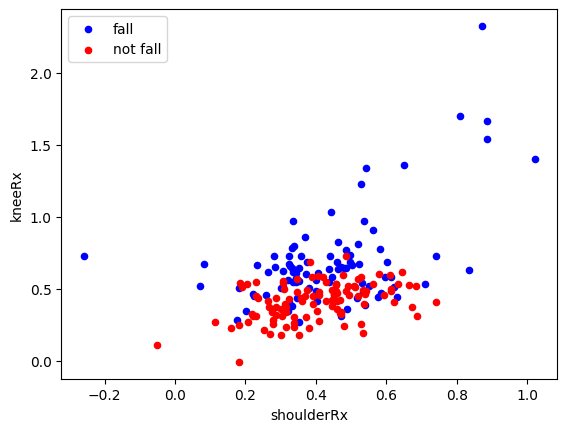

In [8]:
axes=fall_df.plot(kind='scatter', x='shoulderRx', y='kneeRx',color='blue',label='fall')
notFall_df.plot(kind='scatter', x='shoulderRx', y='kneeRx',color='red',label='not fall', ax=axes)

<AxesSubplot: ylabel='Density'>

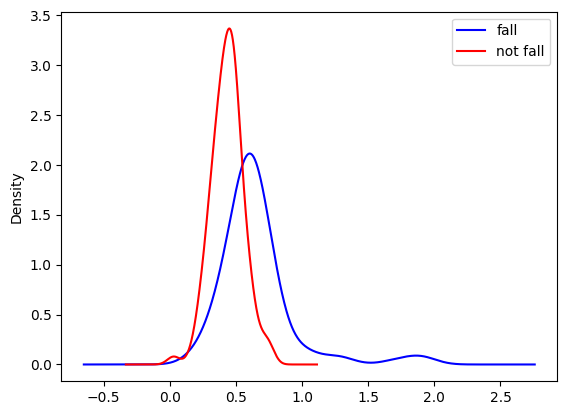

In [9]:
# hip and knee
axes=fall_df.plot(kind='kde', x='kneeRx', y='hipRx',color='blue',label='fall')
notFall_df.plot(kind='kde', x='kneeRx', y='hipRx',color='red',label='not fall', ax=axes)

<AxesSubplot: ylabel='Density'>

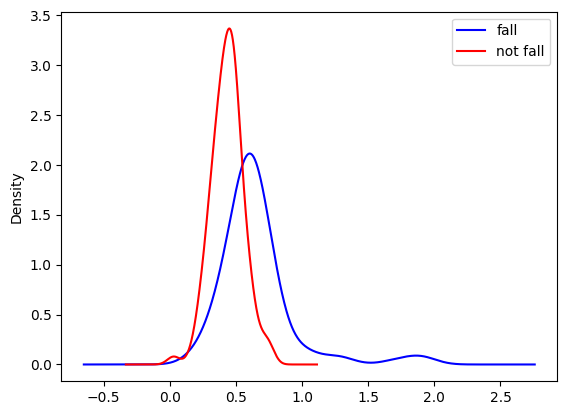

In [10]:
# hip and shoulder
axes=fall_df.plot(kind='kde', x='shoulderRx', y='hipRx',color='blue',label='fall')
notFall_df.plot(kind='kde', x='shoulderRx', y='hipRx',color='red',label='not fall', ax=axes)

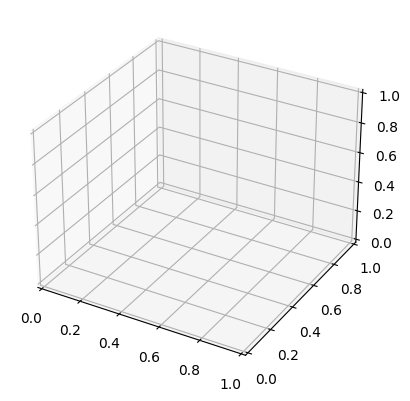

In [11]:
# %matplotlib widget

# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure()
# ax = Axes3D(fig)

# plot_geeks = ax.scatter(shoulderRx,hipRx,kneeRx, color='green')

# ax.set_title("3D plot")
# ax.set_xlabel('Knee')
# ax.set_ylabel('Shoulder')
# ax.set_zlabel('Hip')

# plt.show()

from mpl_toolkits import mplot3d
# ax = plt.axes(projection="3d")
# ax.scatter(3,4,5)
# plt.show()

ax = plt.axes(projection="3d")
# x_data=motion_df['shoulderRx']
x_data=np.arange(0,50,0.1)


In [12]:
motion_df.columns
feature_df = motion_df[['shoulderRx', 'shoulderRy', 'hipRx', 'hipRy', 'kneeRx',
       'kneeRy', 'shoulderLx', 'shoulderLy', 'hipLx', 'hipLy', 'kneeLx',
       'kneeLy']]
# 100*11 - 100*10

# independent
x = np.asarray(feature_df)

# dependent
y = np.asarray(motion_df['fall'])

x[0:5]
y[0:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [13]:
# df - train,test
# train xy, test xy 
# x is 2d array, y is 1d array 

from sklearn.model_selection import train_test_split
# import sklearn

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

# 158*12
x_train.shape
y_train.shape

#test
# 40*12
x_test.shape

(40, 12)

In [14]:
# Modelling
from sklearn import svm
classifier = svm.SVC(kernel='linear', gamma='auto',C=2)
classifier.fit(x_train, y_train)

y_predict = classifier.predict(x_test)

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      1.00      0.98        21

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



In [16]:
# .plot(kind='scatter', x='y_test', y='y_predict',color='blue',label='fall')
# notFall_df.plot(kind='scatter', x='kneeRx', y='hipRx',color='red',label='not fall', ax=axes)